## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import tensorflow.keras as keras
import matplotlib.pyplot as plt


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def plot_history(model):
    """
    Get the training loss / validation loss / training accuracy / validation accuracy and plot them
    """

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [5]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 8s 167us/sample - loss: 1.9289 - accuracy: 0.3043 - val_loss: 1.7460 - val_accuracy: 0.3772
Epoch 2/200
50000/50000 [==============================] - 7s 142us/sample - loss: 1.6965 - accuracy: 0.3965 - val_loss: 1.6370 - val_accuracy: 0.4204
Epoch 3/200
50000/50000 [==============================] - 7s 141us/sample - loss: 1.6142 - accuracy: 0.4236 - val_loss: 1.5979 - val_accuracy: 0.4322
Epoch 4/200
50000/50000 [==============================] - 6s 127us/sample - loss: 1.5514 - accuracy: 0.4467 - val_loss: 1.5437 - val_accuracy: 0.4543
Epoch 5/200
50000/50000 [==============================] - 6s 130us/sample - loss: 1.5017 - accuracy: 0.4647 - val_loss: 1.4922 - val_accuracy: 0.4663
Epoch 6/200
50000/50000 [==============================] - 6s 126us/sample - loss: 1.4493 - accuracy: 0.4849 - val_loss: 1.5004 - val_accuracy: 0.4626
Epoch 7/200
50000/50000 [===================

Epoch 108/200
50000/50000 [==============================] - 6s 112us/sample - loss: 0.2531 - accuracy: 0.9096 - val_loss: 3.5948 - val_accuracy: 0.4954
Epoch 109/200
50000/50000 [==============================] - 6s 115us/sample - loss: 0.2750 - accuracy: 0.8994 - val_loss: 3.6174 - val_accuracy: 0.4998
Epoch 110/200
50000/50000 [==============================] - 5s 110us/sample - loss: 0.2610 - accuracy: 0.9067 - val_loss: 3.8337 - val_accuracy: 0.4991
Epoch 111/200
50000/50000 [==============================] - 6s 114us/sample - loss: 0.2476 - accuracy: 0.9113 - val_loss: 3.7300 - val_accuracy: 0.4969
Epoch 112/200
50000/50000 [==============================] - 6s 113us/sample - loss: 0.2050 - accuracy: 0.9272 - val_loss: 3.7544 - val_accuracy: 0.5006
Epoch 113/200
50000/50000 [==============================] - 5s 110us/sample - loss: 0.2181 - accuracy: 0.9204 - val_loss: 3.8670 - val_accuracy: 0.4942
Epoch 114/200
50000/50000 [==============================] - 5s 109us/sample - los

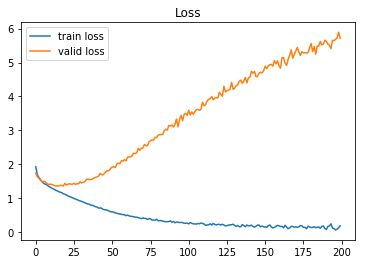

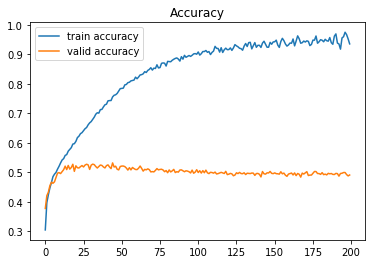

In [9]:
plot_history(model)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 127us/sample - loss: 2.2977 - accuracy: 0.2555 - val_loss: 1.8259 - val_accuracy: 0.3343
Epoch 2/500
50000/50000 [==============================] - 6s 121us/sample - loss: 1.7741 - accuracy: 0.3588 - val_loss: 1.7124 - val_accuracy: 0.3844
Epoch 3/500
50000/50000 [==============================] - 7s 138us/sample - loss: 1.6814 - accuracy: 0.3965 - val_loss: 1.6349 - val_accuracy: 0.4165
Epoch 4/500
50000/50000 [==============================] - 9s 189us/sample - loss: 1.6323 - accuracy: 0.4145 - val_loss: 1.6167 - val_accuracy: 0.4166
Epoch 5/500
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5907 - accuracy: 0.4310 - val_loss: 1.5916 - val_accuracy: 0.4314
Epoch 6/500
50000/50000 [==============================] - 6s 128us/sample - loss: 1.5568 - accuracy: 0.4444 - val_loss: 1.5571 - val_accuracy: 0.4414
Epoch 7/500
50000/50000 [===================

50000/50000 [==============================] - 6s 114us/sample - loss: 1.0318 - accuracy: 0.6329 - val_loss: 1.4964 - val_accuracy: 0.5107
Epoch 55/500
50000/50000 [==============================] - 6s 111us/sample - loss: 1.0188 - accuracy: 0.6387 - val_loss: 1.4910 - val_accuracy: 0.5164
Epoch 56/500
50000/50000 [==============================] - 6s 113us/sample - loss: 1.0115 - accuracy: 0.6398 - val_loss: 1.5345 - val_accuracy: 0.5008
Epoch 57/500
50000/50000 [==============================] - 6s 111us/sample - loss: 1.0173 - accuracy: 0.6389 - val_loss: 1.5317 - val_accuracy: 0.5025
Epoch 58/500
50000/50000 [==============================] - 6s 111us/sample - loss: 1.0047 - accuracy: 0.6434 - val_loss: 1.5459 - val_accuracy: 0.4974
Epoch 59/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.9940 - accuracy: 0.6461 - val_loss: 1.5503 - val_accuracy: 0.5034
Epoch 60/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.9897 - accuracy

Epoch 108/500
50000/50000 [==============================] - 6s 121us/sample - loss: 0.7669 - accuracy: 0.7294 - val_loss: 1.9759 - val_accuracy: 0.4901
Epoch 109/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.7579 - accuracy: 0.7325 - val_loss: 2.0858 - val_accuracy: 0.4852
Epoch 110/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.7551 - accuracy: 0.7309 - val_loss: 2.0290 - val_accuracy: 0.4873
Epoch 111/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.7568 - accuracy: 0.7318 - val_loss: 1.9758 - val_accuracy: 0.4884
Epoch 112/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.7478 - accuracy: 0.7369 - val_loss: 2.0534 - val_accuracy: 0.4903
Epoch 113/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.7427 - accuracy: 0.7377 - val_loss: 2.0472 - val_accuracy: 0.4844
Epoch 114/500
50000/50000 [==============================] - 6s 112us/sample - los

50000/50000 [==============================] - 6s 114us/sample - loss: 0.6230 - accuracy: 0.7781 - val_loss: 2.6061 - val_accuracy: 0.4735
Epoch 162/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.6150 - accuracy: 0.7824 - val_loss: 2.6114 - val_accuracy: 0.4737
Epoch 163/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.6218 - accuracy: 0.7782 - val_loss: 2.5787 - val_accuracy: 0.4702
Epoch 164/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.6115 - accuracy: 0.7831 - val_loss: 2.5549 - val_accuracy: 0.4682
Epoch 165/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.6158 - accuracy: 0.7808 - val_loss: 2.6390 - val_accuracy: 0.4681
Epoch 166/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.6169 - accuracy: 0.7800 - val_loss: 2.5731 - val_accuracy: 0.4785
Epoch 167/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.6148 - ac

50000/50000 [==============================] - 5s 110us/sample - loss: 0.5300 - accuracy: 0.8127 - val_loss: 3.1626 - val_accuracy: 0.4689
Epoch 215/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.5325 - accuracy: 0.8098 - val_loss: 3.1298 - val_accuracy: 0.4585
Epoch 216/500
50000/50000 [==============================] - 6s 119us/sample - loss: 0.5212 - accuracy: 0.8157 - val_loss: 3.1674 - val_accuracy: 0.4671
Epoch 217/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.5260 - accuracy: 0.8142 - val_loss: 3.2171 - val_accuracy: 0.4640
Epoch 218/500
50000/50000 [==============================] - 5s 110us/sample - loss: 0.5373 - accuracy: 0.8098 - val_loss: 3.1230 - val_accuracy: 0.4604
Epoch 219/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.5328 - accuracy: 0.8101 - val_loss: 3.2188 - val_accuracy: 0.4638
Epoch 220/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.5281 - ac

50000/50000 [==============================] - 6s 112us/sample - loss: 0.4800 - accuracy: 0.8292 - val_loss: 3.7093 - val_accuracy: 0.4602
Epoch 268/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4655 - accuracy: 0.8337 - val_loss: 3.6043 - val_accuracy: 0.4573
Epoch 269/500
50000/50000 [==============================] - 5s 110us/sample - loss: 0.4730 - accuracy: 0.8307 - val_loss: 3.6148 - val_accuracy: 0.4606
Epoch 270/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4724 - accuracy: 0.8323 - val_loss: 3.7111 - val_accuracy: 0.4513
Epoch 271/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.4563 - accuracy: 0.8363 - val_loss: 3.7943 - val_accuracy: 0.4542
Epoch 272/500
50000/50000 [==============================] - 5s 110us/sample - loss: 0.4729 - accuracy: 0.8321 - val_loss: 3.7466 - val_accuracy: 0.4541
Epoch 273/500
50000/50000 [==============================] - 5s 110us/sample - loss: 0.4933 - ac

50000/50000 [==============================] - 6s 110us/sample - loss: 0.4186 - accuracy: 0.8520 - val_loss: 4.1742 - val_accuracy: 0.4513
Epoch 321/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4289 - accuracy: 0.8462 - val_loss: 4.1825 - val_accuracy: 0.4544
Epoch 322/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.4360 - accuracy: 0.8430 - val_loss: 4.1789 - val_accuracy: 0.4535
Epoch 323/500
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4478 - accuracy: 0.8417 - val_loss: 4.2320 - val_accuracy: 0.4493
Epoch 324/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.4525 - accuracy: 0.8377 - val_loss: 4.2575 - val_accuracy: 0.4497
Epoch 325/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.4125 - accuracy: 0.8531 - val_loss: 4.3214 - val_accuracy: 0.4486
Epoch 326/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.4321 - ac

50000/50000 [==============================] - 6s 124us/sample - loss: 0.3803 - accuracy: 0.8637 - val_loss: 4.6860 - val_accuracy: 0.4524
Epoch 374/500
50000/50000 [==============================] - 6s 122us/sample - loss: 0.3960 - accuracy: 0.8595 - val_loss: 4.6801 - val_accuracy: 0.4491
Epoch 375/500
50000/50000 [==============================] - 6s 126us/sample - loss: 0.4244 - accuracy: 0.8473 - val_loss: 4.6643 - val_accuracy: 0.4494
Epoch 376/500
50000/50000 [==============================] - 6s 122us/sample - loss: 0.3791 - accuracy: 0.8657 - val_loss: 4.7000 - val_accuracy: 0.4561
Epoch 377/500
50000/50000 [==============================] - 6s 123us/sample - loss: 0.3776 - accuracy: 0.8663 - val_loss: 4.9323 - val_accuracy: 0.4450
Epoch 378/500
50000/50000 [==============================] - 6s 121us/sample - loss: 0.4051 - accuracy: 0.8552 - val_loss: 4.7949 - val_accuracy: 0.4459
Epoch 379/500
50000/50000 [==============================] - 6s 119us/sample - loss: 0.3744 - ac

50000/50000 [==============================] - 6s 113us/sample - loss: 0.3445 - accuracy: 0.8784 - val_loss: 5.0074 - val_accuracy: 0.4439
Epoch 427/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3512 - accuracy: 0.8745 - val_loss: 4.9506 - val_accuracy: 0.4512
Epoch 428/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.3596 - accuracy: 0.8728 - val_loss: 5.0532 - val_accuracy: 0.4455
Epoch 429/500
50000/50000 [==============================] - 6s 116us/sample - loss: 0.4096 - accuracy: 0.8542 - val_loss: 5.1318 - val_accuracy: 0.4454
Epoch 430/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3687 - accuracy: 0.8682 - val_loss: 5.2005 - val_accuracy: 0.4430
Epoch 431/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3921 - accuracy: 0.8584 - val_loss: 5.0853 - val_accuracy: 0.4498
Epoch 432/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3675 - ac

50000/50000 [==============================] - 6s 116us/sample - loss: 0.3974 - accuracy: 0.8577 - val_loss: 5.6676 - val_accuracy: 0.4425
Epoch 480/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.3510 - accuracy: 0.8753 - val_loss: 5.5259 - val_accuracy: 0.4418
Epoch 481/500
50000/50000 [==============================] - 6s 114us/sample - loss: 0.3483 - accuracy: 0.8755 - val_loss: 5.5231 - val_accuracy: 0.4417
Epoch 482/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.3461 - accuracy: 0.8764 - val_loss: 5.4040 - val_accuracy: 0.4477
Epoch 483/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.3397 - accuracy: 0.8773 - val_loss: 5.4721 - val_accuracy: 0.4440
Epoch 484/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.3520 - accuracy: 0.8725 - val_loss: 5.5140 - val_accuracy: 0.4446
Epoch 485/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.3501 - ac

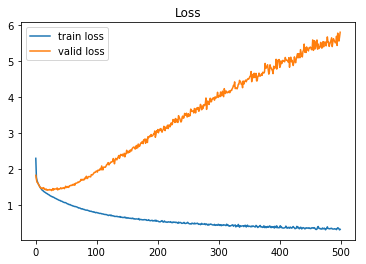

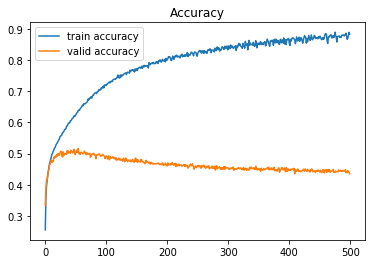

In [13]:
model = build_mlp()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
plot_history(model)

In [10]:
model = build_mlp()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 103us/sample - loss: 2.2800 - accuracy: 0.1456 - val_loss: 2.2330 - val_accuracy: 0.2086
Epoch 2/200
50000/50000 [==============================] - 5s 98us/sample - loss: 2.1996 - accuracy: 0.2256 - val_loss: 2.1708 - val_accuracy: 0.2482
Epoch 3/200
50000/50000 [==============================] - 5s 101us/sample - loss: 2.1448 - accuracy: 0.2591 - val_loss: 2.1212 - val_accuracy: 0.2734
Epoch 4/200
50000/50000 [==============================] - 5s 100us/sample - loss: 2.0982 - accuracy: 0.2773 - val_loss: 2.0777 - val_accuracy: 0.2890
Epoch 5/200
50000/50000 [==============================] - 5s 100us/sample - loss: 2.0580 - accuracy: 0.2939 - val_loss: 2.0407 - val_accuracy: 0.2980
Epoch 6/200
50000/50000 [==============================] - 5s 100us/sample - loss: 2.0238 - accuracy: 0.3035 - val_loss: 2.0099 - val_accuracy: 0.3085
Epoch 7/200
50000/50000 [====================

Epoch 55/200
50000/50000 [==============================] - 5s 103us/sample - loss: 1.6645 - accuracy: 0.4211 - val_loss: 1.6739 - val_accuracy: 0.4144
Epoch 56/200
50000/50000 [==============================] - 5s 104us/sample - loss: 1.6615 - accuracy: 0.4194 - val_loss: 1.6663 - val_accuracy: 0.4192
Epoch 57/200
50000/50000 [==============================] - 5s 102us/sample - loss: 1.6583 - accuracy: 0.4228 - val_loss: 1.6641 - val_accuracy: 0.4166
Epoch 58/200
50000/50000 [==============================] - 5s 102us/sample - loss: 1.6552 - accuracy: 0.4227 - val_loss: 1.6601 - val_accuracy: 0.4215
Epoch 59/200
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6521 - accuracy: 0.4242 - val_loss: 1.6583 - val_accuracy: 0.4215
Epoch 60/200
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6491 - accuracy: 0.4262 - val_loss: 1.6617 - val_accuracy: 0.4158
Epoch 61/200
50000/50000 [==============================] - 5s 101us/sample - loss: 1.64

Epoch 109/200
50000/50000 [==============================] - 5s 99us/sample - loss: 1.5317 - accuracy: 0.4676 - val_loss: 1.5545 - val_accuracy: 0.4553
Epoch 110/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.5300 - accuracy: 0.4677 - val_loss: 1.5535 - val_accuracy: 0.4573
Epoch 111/200
50000/50000 [==============================] - 5s 99us/sample - loss: 1.5281 - accuracy: 0.4688 - val_loss: 1.5511 - val_accuracy: 0.4564
Epoch 112/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.5260 - accuracy: 0.4685 - val_loss: 1.5552 - val_accuracy: 0.4527
Epoch 113/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.5243 - accuracy: 0.4700 - val_loss: 1.5488 - val_accuracy: 0.4564
Epoch 114/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.5222 - accuracy: 0.4701 - val_loss: 1.5484 - val_accuracy: 0.4546
Epoch 115/200
50000/50000 [==============================] - 5s 101us/sample - loss: 1.5

Epoch 163/200
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4390 - accuracy: 0.4974 - val_loss: 1.5018 - val_accuracy: 0.4672
Epoch 164/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4376 - accuracy: 0.4988 - val_loss: 1.4827 - val_accuracy: 0.4754
Epoch 165/200
50000/50000 [==============================] - 5s 99us/sample - loss: 1.4358 - accuracy: 0.4987 - val_loss: 1.4827 - val_accuracy: 0.4768
Epoch 166/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4344 - accuracy: 0.4991 - val_loss: 1.4832 - val_accuracy: 0.4775
Epoch 167/200
50000/50000 [==============================] - 5s 100us/sample - loss: 1.4326 - accuracy: 0.5002 - val_loss: 1.4830 - val_accuracy: 0.4778
Epoch 168/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4307 - accuracy: 0.5012 - val_loss: 1.4904 - val_accuracy: 0.4695
Epoch 169/200
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4

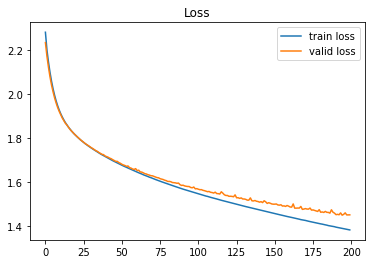

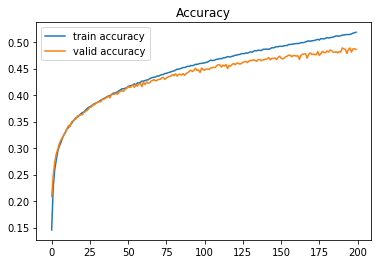

In [11]:
plot_history(model)